# NAME : SNEHEE PATEL

### Task 4: Prediction using Decision Tree Algorithm

For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

### 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from IPython.display import Image  
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
import sklearn
import pydotplus
import matplotlib.pyplot as plt
import os
from six import StringIO  

### 2. Getting the data

In [2]:
data = load_iris()
df = pd.DataFrame(data.data,columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 3. Dividing dataset into train and test

In [3]:
X = df
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

### 4.Training classifier

In [4]:
classifier = DecisionTreeClassifier()
# Train Decision Tree Classifer
classifier = classifier.fit(X_train,y_train)

### 5.Testing data

In [5]:
y_pred = classifier.predict(X_test)

#Compare between predicted and actual class
df = pd.DataFrame({'Predicted Class':y_pred, 'Actual Class':y_test})
print(df.head(10))

   Predicted Class  Actual Class
0                0             0
1                1             1
2                1             1
3                0             0
4                2             2
5                1             1
6                2             2
7                0             0
8                0             0
9                2             2


### 6.Visulizing data 

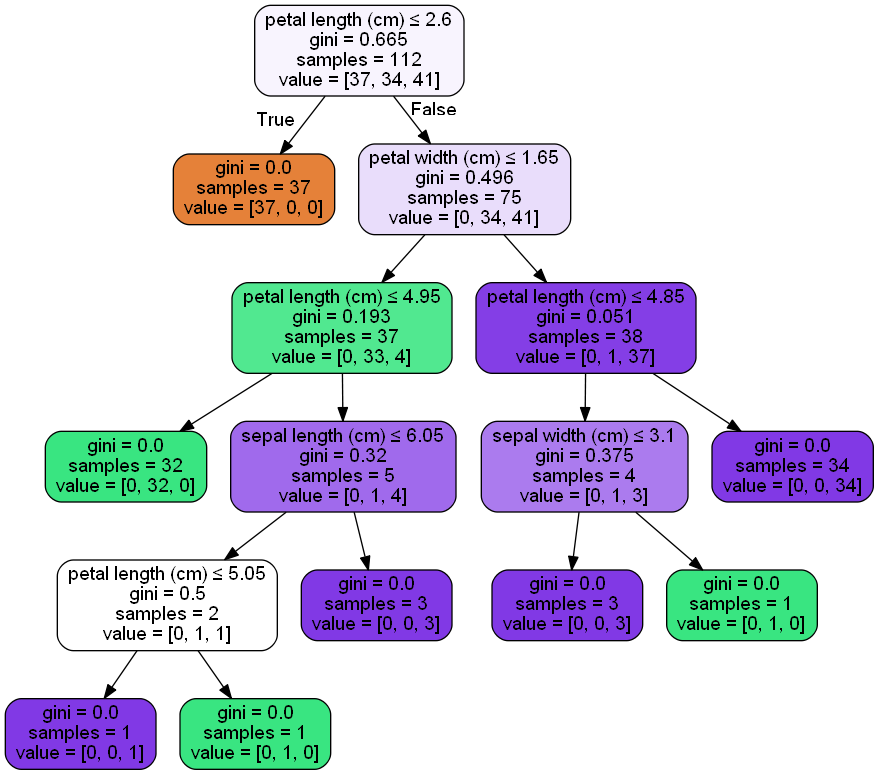

In [6]:
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, feature_names=data.feature_names,filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### 7. Accuracy of model

In [7]:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.9736842105263158

### 8. Confusion matrix and Classification report

In [8]:
print('\033[1m'+"Confusion Matrix")
print ('\033[0m')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [9]:
print('\033[1m'+"Classification Report")
print ('\033[0m')
print(classification_report(y_test, y_pred))

Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

